In [1]:
import ode
import numpy as np
import math
import matplotlib.pyplot as plt
from vpython import *

<IPython.core.display.Javascript object>

In [2]:
#independent variablesg = 10 #N/kg
R = 1  #m
m1 = .1 #mass of penn 1
m2 = .1 #mass of penn 2
L1 = .8
L2 = .8
g = 10
    
def pendulum(dep, t):

    """ Calculate and return the derivative [d/dt, d^2/dt^2] evaluated as a function of y, dy/dt, and t
    where y is the dependent variable.
    
    Keyword arguments:
    t -- time at the beginning of the time step
    dep -- an array of the dependent variable and its derivative [y, dy/dt]_n at time t
    """    
    theta = dep[0]
    omega = dep[1]
    theta2 = dep[2]
    omega2 = dep[3]
    #deriv = np.zeros(4) 
    
    #dtheta / dt
    dtheta = omega
    #domega/ dt
    domega = (-g*(2*m1+m2)*np.sin(theta) - m2*g*np.sin(theta-2*theta2) - 2*np.sin(theta-theta2)*m2*((omega2**2)*L2 + (omega2**2)*L1*np.cos(theta-theta2))) / (L1*((2*m1+m2)-(m2*cos(2*np.cos(2*theta-2*theta2))))) #domega/dt
    
    #dtheta2 / dt
    dtheta2 = omega2
    #domega2 / dt
    domega2 = (2*np.sin(theta-theta2) * (omega*L1*(m1+m2) + g*(m1+m2)*np.cos(theta) + (omega2**2)*L2*m2*np.cos(theta-theta2))) / (L2*((2*m1+m2)-(m2*np.cos(2*np.cos(2*theta-2*theta2))))) #equation for theta2 
    
    #array of dependent variables
    deriv = np.array([dtheta, domega, dtheta2, domega2])
    
    #This returns the value of the diff eq (i.e second deriv of theta 1 theta2)
    return deriv

#dependent variables
theta = np.pi/2
omega = 0
theta2 = np.pi/2
omega2 = 0

data = np.array([theta, omega, theta2, omega2]) #initialize array to store dependent variables

#independent variable
t = 0
h = 0.01
Nsteps = int(5/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t
tarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
omegaarr = np.zeros(Nsteps)
theta2arr = np.zeros(Nsteps)
omega2arr = np.zeros(Nsteps)

tarr[0] = t
thetaarr[0] = theta
omegaarr[0] = omega
theta2arr[0] = theta2
omega2arr[0] = omega2

#create a time evolution loop
for n in range(1,Nsteps):
    
    data = ode.RK4(pendulum, data, t, h) #update [theta, omega]
    
    t = t + h #update values
    
    #store values in arrays
    tarr[n] = t
    
    #for the total energy
    y = -R*np.cos(data[0])
    v = R*np.cos(data[1])
    
    thetaarr[n] = data[0] #store theta
    omegaarr[n] = data[1] #store omega
    theta2arr[n] = data[2] #store theta2
    omega2arr[n] = data[3] #store omega2
     

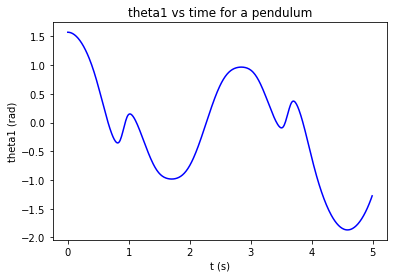

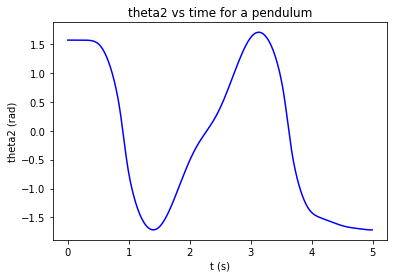

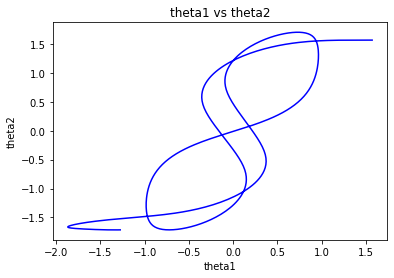

In [3]:
#Graph of Thet1 and Theta2 vs time
plt.figure()
plt.title("theta1 vs time for a pendulum")
plt.xlabel("t (s)")
plt.ylabel("theta1 (rad)")
plt.plot(tarr, thetaarr, 'b-')
plt.show()

plt.figure()
plt.title("theta2 vs time for a pendulum")
plt.xlabel("t (s)")
plt.ylabel("theta2 (rad)")
plt.plot(tarr, theta2arr, 'b-')
plt.show()

plt.figure()
plt.title("theta1 vs theta2")
plt.xlabel("theta1")
plt.ylabel("theta2")
plt.plot(thetaarr, theta2arr, 'b-')
plt.show()

In [ ]:
scene = canvas()

#coordinates
x1 = L1 * np.sin(theta)
y1 = -L1 * np.cos(theta)
x2 = x1 + L2*sin(theta2)
y2 = y1 + y1-L2*cos(theta2)

#pendulum 1
ball = sphere(pos= vec(R*np.sin(theta),-R*np.cos(theta),0),color=color.green,radius = R/10,make_trail = True)
rod = cylinder(pos= vec(0,0,0), axis = ball.pos,radius = ball.radius/4)

#pendulum 2
ball1 = sphere(pos= vec(R*np.sin(theta2),-R*np.cos(theta2),1),color= color.cyan,radius= R/10,make_trail = True)
rod1 = cylinder(pos= vec(0,0,0), axis= ball1.pos,radius= ball1.radius/4)

scene.pause()

for theta in thetaarr: 
    rate(100)#slows down the anamation for veiwing pleasure
    ball.pos = vec(R*np.sin(theta),-R*np.cos(theta),0)
    #ball1.pos = vec(R*np.sin(theta2),-R*np.cos(theta2),1)
    rod.axis = ball.pos
    #rod1.axis = ball1.pos
    


In [ ]:
## create the ceiling, masses, and strings
scene = canvas()

# starting angle & momentum for Pen 1
theta1 = 1.2 # starting angle in rads
p1 = m1*vector(0,0,0) # starting momentum

# starting angle & momentum for Pen 2
theta2 = 3.8
p2 = m2*vector(0,0,0)

# treat the strings as springs with very large k to get tension
#k = 1e5 

ceiling = box(pos=vector(-0.5,1,0), size = vector(0.2, 0.01, 0.2))
ball1 = sphere(pos=vector(ceiling.pos.x+L1*sin(theta),ceiling.pos.y-L1*cos(theta),0), radius=0.05, color=color.green , make_trail=True,interval=40,retain=1e4) 
ball1.color=color.green
ball1.radius=0.05
ball2 = sphere(pos=vector(ceiling.pos.x+L1*sin(theta)+L2*sin(theta2),ceiling.pos.y-L1*cos(theta)-L2*cos(theta2),0), radius=0.05, color=color.cyan, make_trail=True,interval=20,retain=1e4) 
ball2.color=color.cyan
ball2.radius=0.05
string1 = cylinder(pos=ceiling.pos, axis=ball1.pos-ceiling.pos, color=color.white, radius=0.008)
string2 = cylinder(pos=ball1.pos, axis=ball2.pos-ball1.pos, color=color.white, radius=0.008)

#oscillation = graph(title='', xtitle='theta1', ytitle='theta2')
#anglegraph = gcurve(color=color.red) # graph the angles

## calculation loop
while t < 1e2:
    #rate(20)
    rate(100)
    
    x1 = L1 * np.sin(theta)
    y1 = -L1 * np.cos(theta)
    x2 = x1 + L2*sin(theta2)
    y2 = y1 + y1-L2*cos(theta2)
    
    #anglegraph.plot(pos=(atan2(string1.axis.x,-string1.axis.y),atan2(string2.axis.x,-string2.axis.y)))
    t = t + h

<IPython.core.display.Javascript object>